# Home Loan Wizard: Unlocking the Power of Data for Smarter Loan Approvals



## Problem and Data Explanation:

Dream Housing Finance Company is a leading provider of home loans across urban, semi-urban, and rural areas. Currently, the loan eligibility process is conducted manually, which can be time-consuming and prone to human error. To address this, the company aims to automate the loan approval process by leveraging the power of data and predictive modeling.

The objective of this project is to develop a machine learning model that can accurately predict the eligibility of customers for a home loan based on various factors such as gender, marital status, education, number of dependents, income, loan amount, credit history, and more. By automating this process, the company seeks to enhance efficiency, reduce processing time, and improve overall customer experience.

### **Objective:**

The main objective of this project is to create a predictive model that can classify customers as eligible or ineligible for a home loan based on their application details. The model will analyze historical data and learn the patterns and relationships between various features to make accurate predictions. The ultimate goal is to assist Dream Housing Finance Company in making informed decisions regarding loan approvals and targeting specific customer segments.

## **Roadmap:**

1. Data Exploration and Preprocessing:
   - Perform exploratory data analysis (EDA) to gain insights into the dataset.
   - Handle missing values, outliers, and data inconsistencies.
   - Conduct feature engineering to enhance the predictive power of the model.
   
2. Model Selection and Training:
   - Select an appropriate machine learning model for loan eligibility prediction.
   - Split the dataset into training and testing sets.
   - Train the model using the training data and evaluate its performance.
   
3. Model Evaluation and Optimization:
   - Assess the model's performance using evaluation metrics such as accuracy, precision, recall, and F1-score.
   - Fine-tune the model by adjusting hyperparameters and optimizing its performance.
   
4. Model Deployment and Integration:
   - Deploy the trained model into a production environment.
   
   


By following this roadmap, we aim to develop an efficient and accurate loan eligibility prediction system that will streamline operations and improve customer satisfaction for Dream Housing Finance Company.

# Getting Started


As we begin our exciting journey, we have a deep understanding of the upcoming challenge. Now, we will dive into Exploratory Data Analysis (EDA) and explore the art of feature engineering. During our EDA exploration, we will uncover interesting irregularities, observe fascinating trends, understand complex connections, and discover hidden patterns. These valuable insights will be the foundation for our feature engineering efforts and help us create powerful models. Our exploration will involve both analyzing data with numbers and using visual representations.

Once we have a complete understanding of the data and uncover any potentially useful relationships, we will move on to feature engineering. This essential step is at the core of the machine learning process, shaping its success. Additionally, we will establish a basic model as a starting point to build upon.

#### Imports

We'll use a familiar stack of data science libraries: `Pandas`, `numpy`, `matplotlib`, `seaborn`, and eventually `sklearn` for modeling. 

In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

/home/deep/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Read in Data and Look at Summary Information

In [2]:
pd.options.display.max_columns = 150

# Read in data
train = pd.read_csv('loan_sanction_train.csv')
test = pd.read_csv('loan_sanction_test.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Data Exploration and Preprocessing

In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


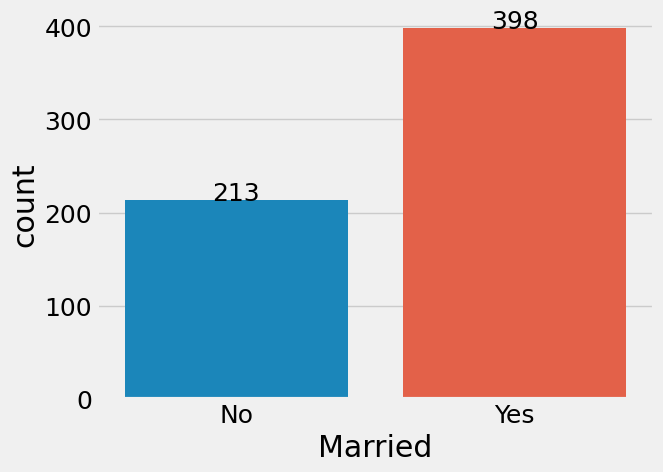

In [5]:
ax = sns.countplot(x=train["Married"])
# Add count values on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Display the plot
plt.show()

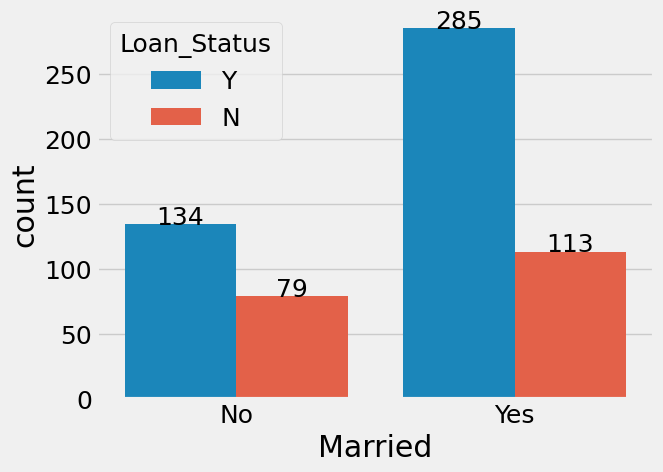

In [6]:
ax = sns.countplot(data=train, x="Married", hue="Loan_Status")

# Add count values on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Display the plot
plt.show()

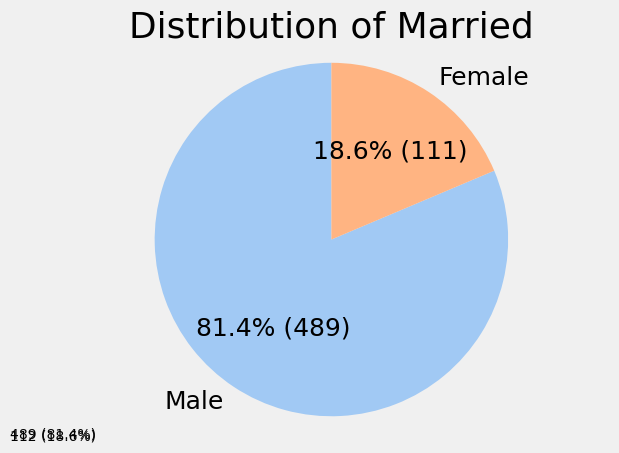

In [7]:
gender_counts = train['Gender'].value_counts()

plt.pie(gender_counts, labels=gender_counts.index, autopct=lambda pct: f"{pct:.1f}% ({int(pct/100*sum(gender_counts))})",
        startangle=90, colors=sns.color_palette('pastel'))

plt.title('Distribution of Married')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

total = sum(gender_counts)
for i, count in enumerate(gender_counts):
    percentage = count / total * 100
    plt.annotate(f"{count} ({percentage:.1f}%)", (0, 0), (0, -0.5-i), xycoords='axes fraction', textcoords='offset points',
                 va='center', ha='center', fontsize=10)

plt.show()

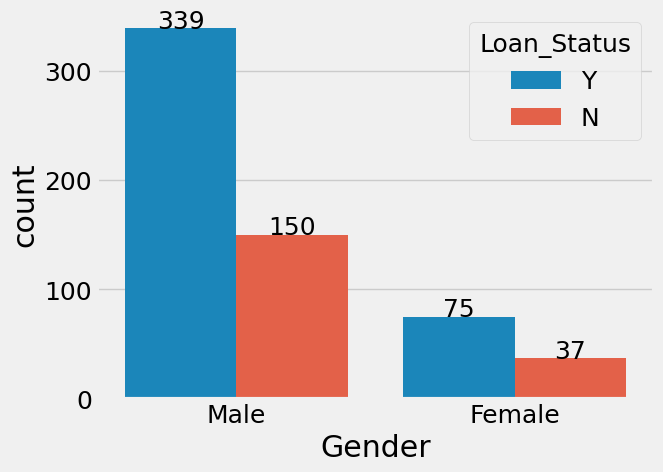

In [8]:
ax = sns.countplot(data=train, x="Gender", hue="Loan_Status")

# Add count values on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Display the plot
plt.show()

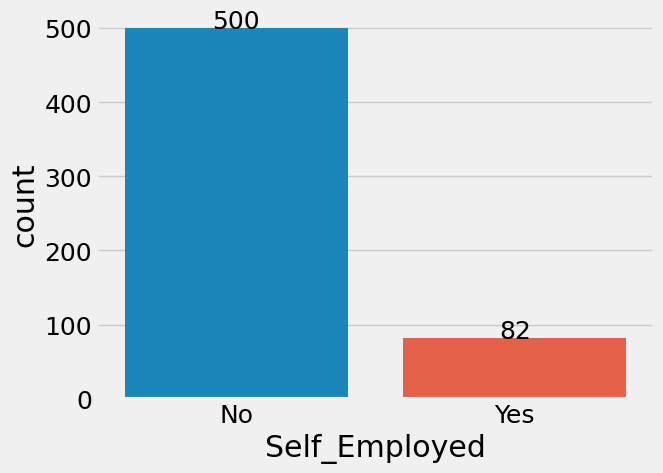

In [9]:
ax = sns.countplot(x=train["Self_Employed"])
# Add count values on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Display the plot
plt.show()

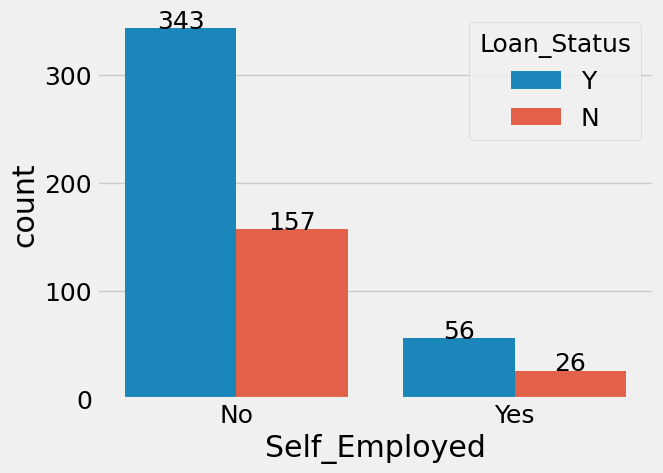

In [10]:
ax = sns.countplot(data=train, x="Self_Employed", hue="Loan_Status")

# Add count values on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Display the plot
plt.show()

In [11]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

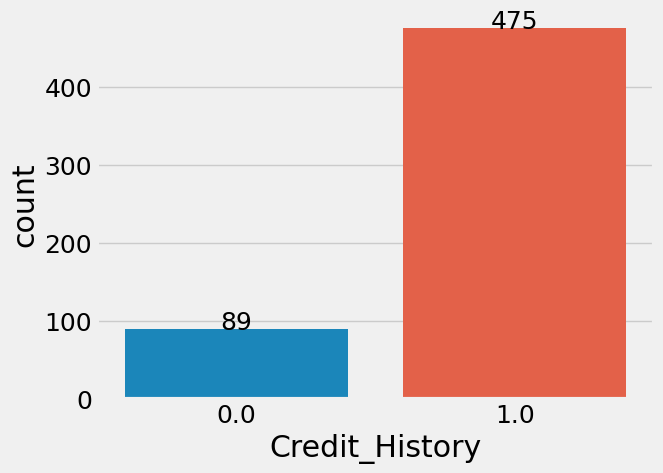

In [12]:
ax = sns.countplot(x=train["Credit_History"])
# Add count values on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Display the plot
plt.show()

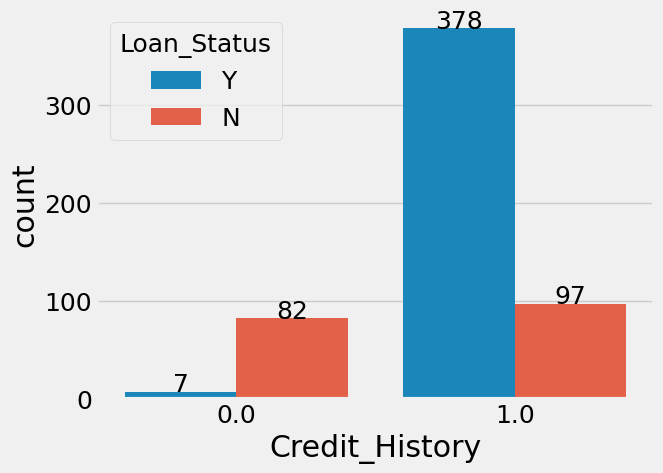

In [13]:
ax = sns.countplot(data=train, x="Credit_History", hue="Loan_Status")

# Add count values on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Display the plot
plt.show()

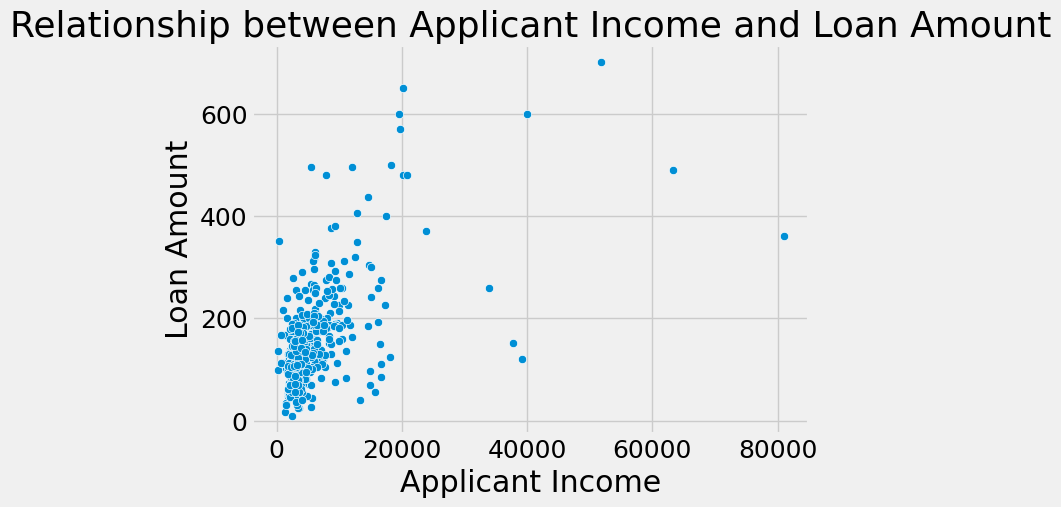

In [14]:
sns.scatterplot(data=train, x='ApplicantIncome', y='LoanAmount',  palette="deep")

# Add labels and title
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Relationship between Applicant Income and Loan Amount')

# Display the plot
plt.show()


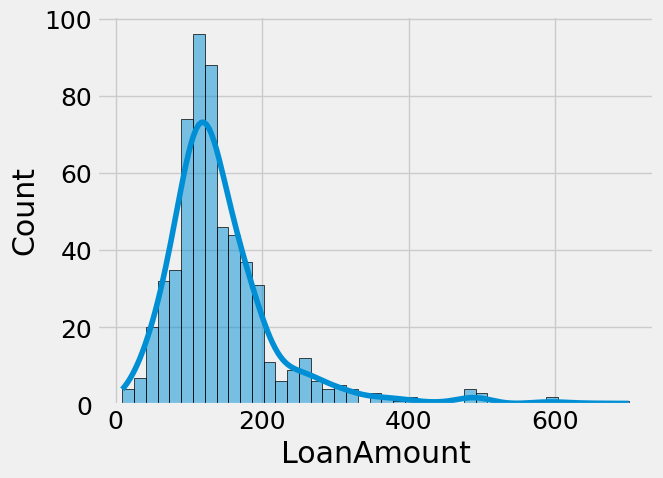

In [15]:
sns.histplot(data=train, x="LoanAmount", kde=True);

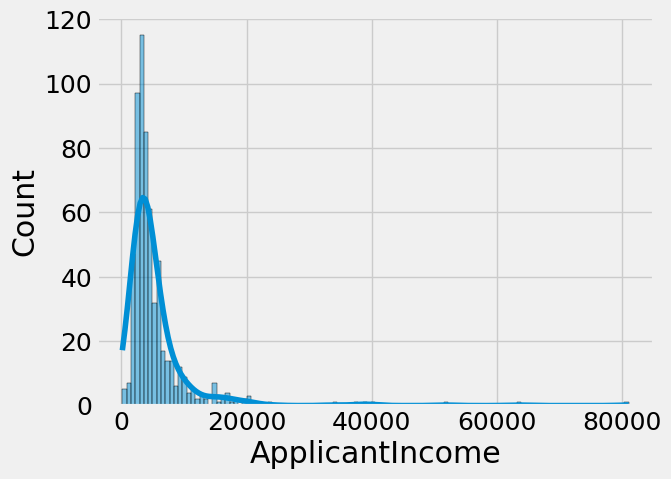

In [16]:
sns.histplot(data=train, x="ApplicantIncome", kde=True);

In [17]:
missing = pd.DataFrame(train.isnull().sum()).rename(columns = {0: 'total'})

# Create a percentage missing
missing['percent'] = missing['total'] / len(train)

missing.sort_values('percent', ascending = False).head(13)

,total,percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


In [19]:
train_notnull = train.dropna()
# test_notnull = test.dropna()

In [160]:
data = train_notnull
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalApplicantIncome
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


### Feature Engineering: Total Applicant Income 

To take into account both the borrower's and coborrower's (if applicable) income. 

In [21]:
data['TotalApplicantIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']
final = data.drop(columns=["ApplicantIncome", "CoapplicantIncome"])
final

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalApplicantIncome
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,267.0,360.0,1.0,Urban,Y,9613.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,187.0,360.0,1.0,Urban,Y,7583.0


## Data pre-processing: feature and label encoding
In our dataset, we encounter various string values across all columns. While humans naturally understand categorical data, it poses a challenge for machines. To effectively leverage machine learning algorithms, numerical representation is crucial. Hence, encoding plays a vital role in the data pre-processing phase, enabling us to convert categorical data into its numerical counterpart without sacrificing any information. The quality of encoding directly influences the construction of a robust model.

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(final[final['Loan_Status'].notnull()]['Loan_Status'])
# Change values in the dataframe that say "3+" to 3
final['Dependents'] = final['Dependents'].replace({'3+': 3}).astype('int')
# Define the desired categories and their corresponding binary values
education_mapping = {'Graduate': 1, 'Not Graduate': 0}
self_employed_mapping = {'Yes': 1, 'No': 0}
married_mapping = {'Yes': 1, 'No': 0}
gender_mapping = {'Male': 1, 'Female': 0}
property_area_mapping = {'Urban': 0, 'Semiurban': 1, 'Rural': 2}

# Apply  encoding to specific columns
final['Education'] = final['Education'].map(education_mapping)
final['Self_Employed'] = final['Self_Employed'].map(self_employed_mapping)
final['Married'] = final['Married'].map(married_mapping)
final['Gender'] = final['Gender'].map(gender_mapping)
final['Property_Area'] = final['Property_Area'].map(property_area_mapping)
final = final.assign(Loan_Status=encoded_label)

In [24]:
data_labels = np.array(list(encoded_label.astype(np.uint8)))

# Extract the training data
data_set = final[final['Loan_Status'].notnull()].drop(columns = ['Loan_ID', 'Loan_Status'])
#test_set = final[final['Loan_Status'].isnull()].drop(columns = ['Loan_ID', 'Loan_Status'])

The data has no missing values and is scaled between zero and one. This means it can be directly used in any Scikit-Learn model. 

# Machine Learning Modeling



In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data_set,
                                                    data_labels,
                                                    test_size=0.2, random_state=40)

To ensure accurate model comparisons, it is essential to normalize the features by scaling them within the range of 0 to 1. While some ensemble models may not require this step, it becomes crucial when utilizing distance-based models like K-Nearest Neighbors or the Support Vector Machine. Scaling the features is an absolute necessity when comparing diverse models, and it is always advisable to do so for optimal results. 
Source : https://www.quora.com/Why-is-it-important-to-normalize-features-when-running-a-random-forest-or-any-other-ensemble-learning-method/answer/Serhii-Kushchenko

In [30]:
from sklearn.preprocessing import StandardScaler

columns_to_normalize = ['TotalApplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

scaler = StandardScaler()

# Apply normalization to the selected columns
X_train[columns_to_normalize] = scaler.fit_transform(X_train[columns_to_normalize])
X_test[columns_to_normalize] = scaler.transform(X_test[columns_to_normalize])

In [31]:
model = RandomForestClassifier(n_estimators=100, random_state=10, 
                                n_jobs = -1)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('F1-score: ', f1_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.62      0.68        24
           1       0.88      0.93      0.91        72

    accuracy                           0.85        96
   macro avg       0.82      0.78      0.79        96
weighted avg       0.85      0.85      0.85        96

F1-score:  0.9054054054054054


## Feature Importances

In [33]:
model.fit(X_train, y_train)
features = list(X_train.columns)

# Feature importances into a dataframe
feature_importances = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
feature_importances

,feature,importance
0,Gender,0.026801
1,Married,0.026876
2,Dependents,0.050231
3,Education,0.024163
4,Self_Employed,0.022447
5,LoanAmount,0.236659
6,Loan_Amount_Term,0.049129
7,Credit_History,0.247895
8,Property_Area,0.055231
9,TotalApplicantIncome,0.260569


In [34]:
def plot_feature_importances(df, n = 10, threshold = None):
    """Plots n most important features. Also plots the cumulative importance if
    threshold is specified and prints the number of features needed to reach threshold cumulative importance.
    Intended for use with any tree-based feature importances. 
    
    Args:
        df (dataframe): Dataframe of feature importances. Columns must be "feature" and "importance".
    
        n (int): Number of most important features to plot. Default is 10.
    
        threshold (float): Threshold for cumulative importance plot. If not provided, no plot is made. Default is None.
        
    Returns:
        df (dataframe): Dataframe ordered by feature importances with a normalized column (sums to 1) 
                        and a cumulative importance column
    
    Note:
    
        * Normalization in this case means sums to 1. 
        * Cumulative importance is calculated by summing features from most to least important
        * A threshold of 0.9 will show the most important features needed to reach 90% of cumulative importance
    
    """
    plt.style.use('fivethirtyeight')
    
    # Sort features with most important at the head
    df = df.sort_values('importance', ascending = False).reset_index(drop = True)
    
    # Normalize the feature importances to add up to one and calculate cumulative importance
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
    
    plt.rcParams['font.size'] = 12
    
    # Bar plot of n most important features
    df.loc[:n, :].plot.barh(y = 'importance_normalized', 
                            x = 'feature', color = 'darkgreen', 
                            edgecolor = 'k', figsize = (12, 8),
                            legend = False, linewidth = 2)

    plt.xlabel('Normalized Importance', size = 18); plt.ylabel(''); 
    plt.title(f'{n} Most Important Features', size = 18)
    plt.gca().invert_yaxis()
    
    
#     if threshold:
#         # Cumulative importance plot
#         plt.figure(figsize = (8, 6))
#         plt.plot(list(range(len(df))), df['cumulative_importance'], 'b-')
#         plt.xlabel('Number of Features', size = 16); plt.ylabel('Cumulative Importance', size = 16); 
#         plt.title('Cumulative Feature Importance', size = 18);
        
#         # Number of features needed for threshold cumulative importance
#         # This is the index (will need to add 1 for the actual number)
#         importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
        
#         # Add vertical line to plot
#         plt.vlines(importance_index + 1, ymin = 0, ymax = 1.05, linestyles = '--', colors = 'red')
#         plt.show();
        
#         print('{} features required for {:.0f}% of cumulative importance.'.format(importance_index + 1, 
#                                                                                   100 * threshold))
    
    return df


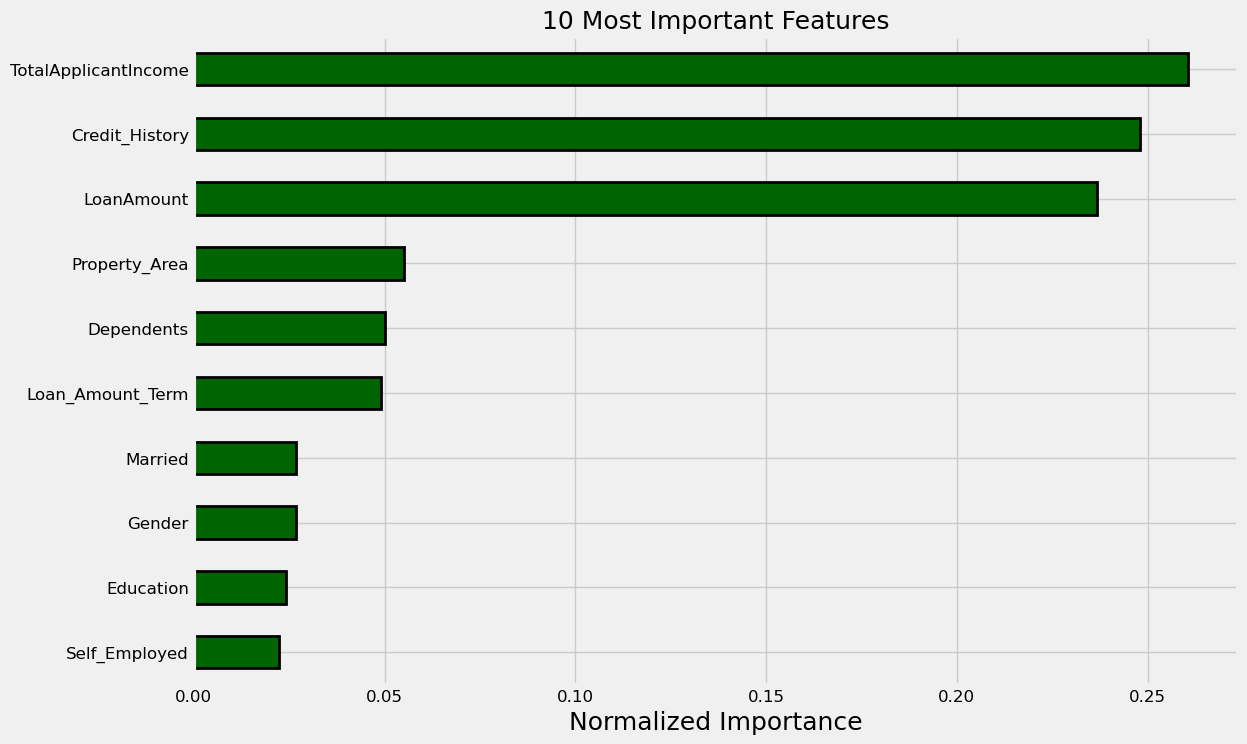

In [35]:
norm_fi = plot_feature_importances(feature_importances)

### Feature Importance: 

Established TotalApplicantIncome is the most important variable in predicting loan approval, followed by Credit_History.

The importance of `TotalApplicantIncome` suggests that the total income of the applicant plays a significant role in determining loan approval. Higher income may indicate a greater ability to repay the loan, which increases the likelihood of loan approval.

The second important variable, `Credit_History`, indicates that the credit history of the applicant has a strong influence on loan approval. A positive credit history demonstrates a reliable repayment track record, making the applicant more creditworthy and increasing the chances of loan approval.



In [36]:
def kde_target(df, variable):
    """Plots the distribution of `variable` in `df` colored by the `Target` column"""
    
    colors = {0: 'red', 1: 'green'}

    plt.figure(figsize = (12, 8))
    
    df = df[df['Loan_Status'].notnull()]
    
    for level in df['Loan_Status'].unique():
        subset = df[df['Loan_Status'] == level].copy()
        sns.kdeplot(subset[variable].dropna(), 
                    label = f'Loan Aoproved: {level}', 
                    color = colors[int(subset['Loan_Status'].unique())])
        plt.legend()

    plt.xlabel(variable); plt.ylabel('Density');
    plt.title('{} Distribution'.format(variable.capitalize()));

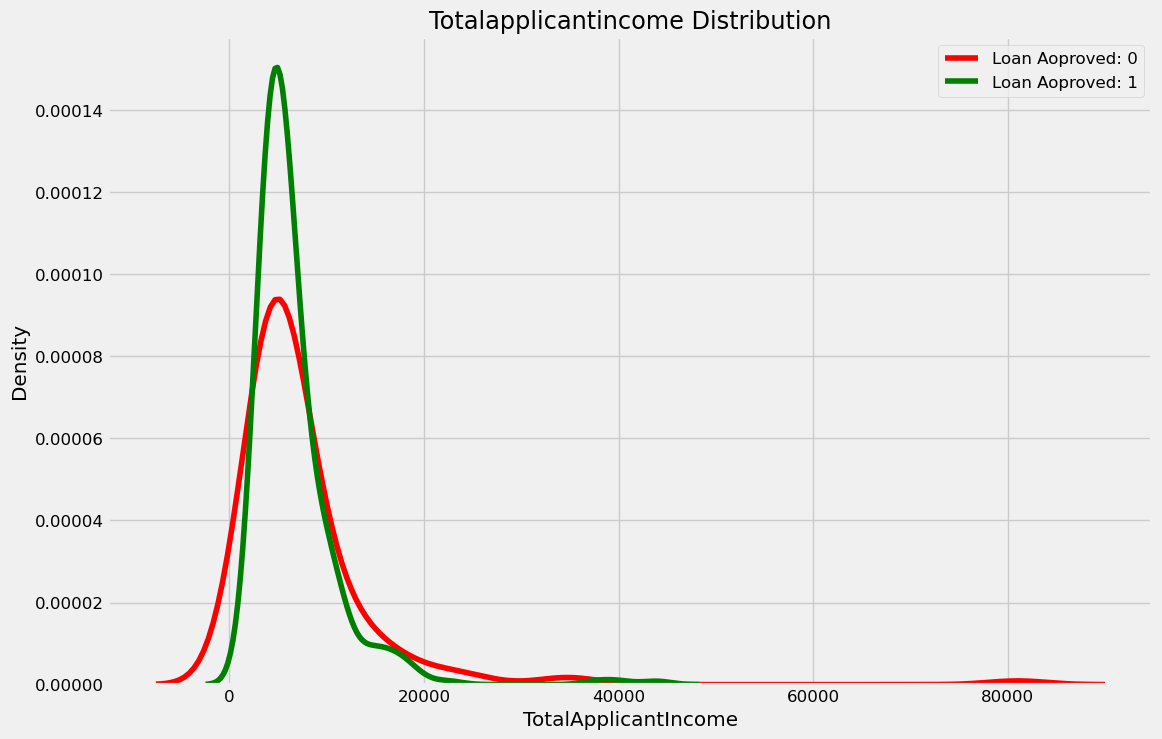

In [37]:
kde_target(final, 'TotalApplicantIncome')

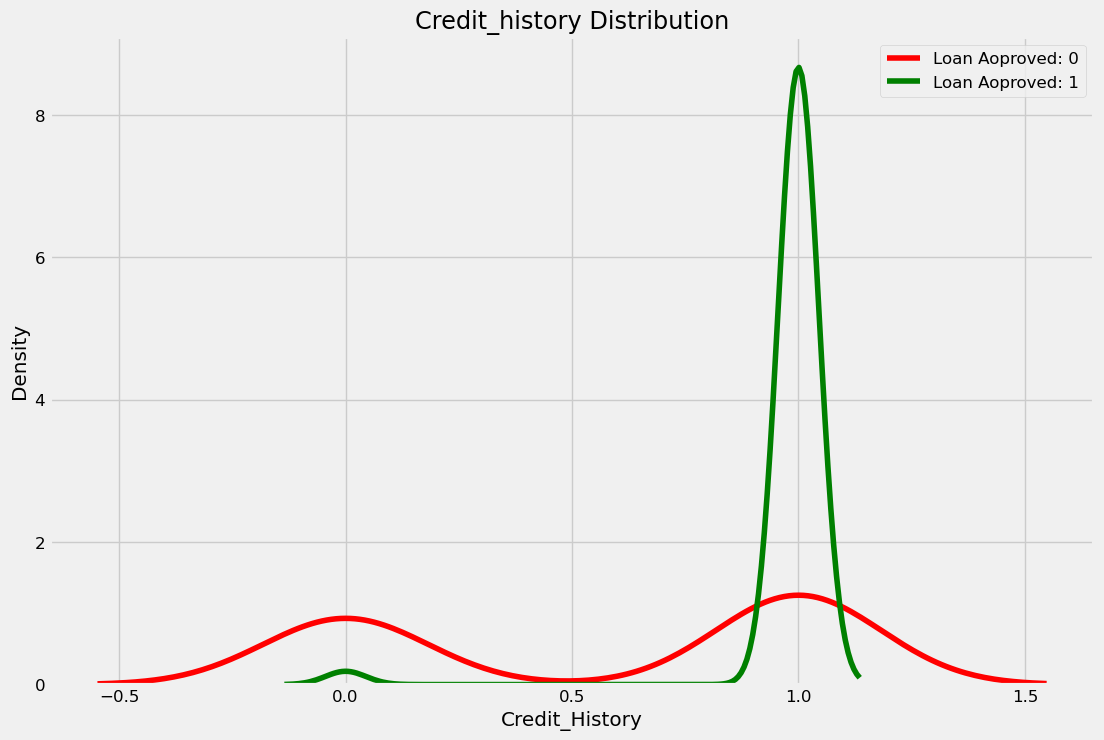

In [38]:
kde_target(final, 'Credit_History')

# Model Selection

Now that we have a good set of features, it's time to get into the modeling. We already tried one basic model, the Random Forest Classifier . However, in machine learning, there is no way to know ahead of time which model will work best for a given dataset.

In [39]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

Presently, we have established a foundational model, and it is essential to recognize that the initial predictions made by a model may not always provide the most reliable basis for our subsequent actions. In light of this, what measures should we take?

Let us examine the following aspects:

1. Hyperparameter tuning: This involves the process of fine-tuning the parameters of our model to enhance its performance and achieve optimal results.
2. Confusion matrix: This matrix allows us to visualize the performance of our classification model by displaying the number of correct and incorrect predictions made across different classes.

3. Cross-validation: Employing cross-validation techniques enables us to assess the robustness and generalizability of our model by testing it on various subsets of the data.

4. Precision: Precision measures the accuracy of positive predictions, indicating the proportion of correctly identified positive instances out of the total predicted positive instances.

5. Recall: Recall, also known as sensitivity or true positive rate, gauges the ability of our model to correctly identify positive instances, illustrating the proportion of correctly predicted positive instances out of the actual positive instances.

6. F1 score: The F1 score combines precision and recall into a single metric, providing a balanced evaluation of our model's performance.

7. Classification report: A comprehensive report that offers a detailed overview of the model's performance, including precision, recall, F1 score, and other relevant metrics, for each class in our dataset.

8. ROC curve: The receiver operating characteristic (ROC) curve illustrates the trade-off between the true positive rate and the false positive rate, aiding in the assessment of the model's performance across different classification thresholds.

9. Area under the curve (AUC): The AUC value represents the overall performance of our model by calculating the area under the ROC curve. It provides a measure of the model's ability to distinguish between positive and negative instances.

In [41]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt

def display_all_metric(model, X_train, y_train, X_test, y_test):
    """
    Fits and evaluates given machine learning models.
    model: a Scikit-Learn machine learning model
    X_train: training data (no labels)
    y_train: training labels
    X_test: testing data (no labels)
    y_test: test labels
    """
    # Set random seed
    np.random.seed(42)
    
    clf = model
    clf.fit(X_train, y_train)
    
    predictions = clf.predict(X_test)
    print("For", model)
    print(classification_report(y_test, predictions))
    
    #cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
    #disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    #disp_cm.plot()
    #plt.tight_layout()
    #plt.show()
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, predictions),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
    bottom, top = ax.get_ylim()
    #ax.set_ylim(bottom + 0.5, top - 0.5)
    
    disp_roc = RocCurveDisplay.from_estimator(model, X_test, y_test)
    #disp_roc.plot()
    #plt.tight_layout()
    plt.show()

In [159]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Xg Boost": XGBClassifier(),
         "LGBM":LGBMClassifier(),
         "GB":GradientBoostingClassifier(),
         "SVC":SVC(),
         "MLP":MLPClassifier(),
         "DT":DecisionTreeClassifier()}

For LogisticRegression()
              precision    recall  f1-score   support

           0       0.80      0.50      0.62        24
           1       0.85      0.96      0.90        72

    accuracy                           0.84        96
   macro avg       0.83      0.73      0.76        96
weighted avg       0.84      0.84      0.83        96



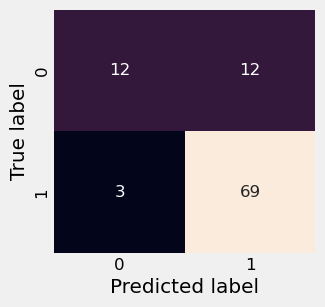

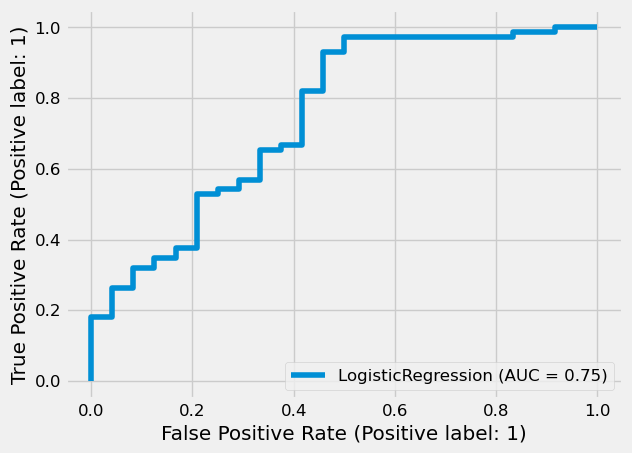

For KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.64      0.29      0.40        24
           1       0.80      0.94      0.87        72

    accuracy                           0.78        96
   macro avg       0.72      0.62      0.63        96
weighted avg       0.76      0.78      0.75        96



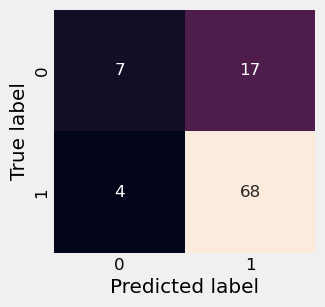

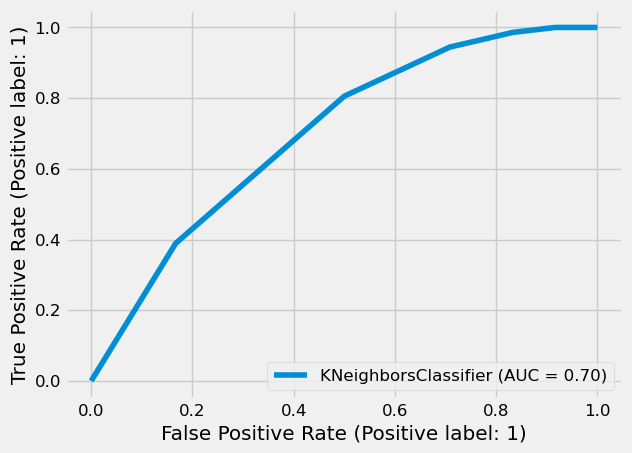

For RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.76      0.67      0.71        24
           1       0.89      0.93      0.91        72

    accuracy                           0.86        96
   macro avg       0.83      0.80      0.81        96
weighted avg       0.86      0.86      0.86        96



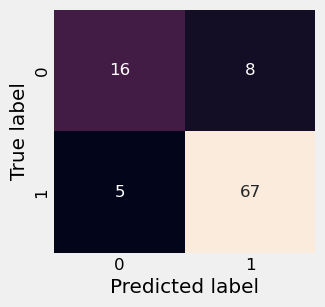

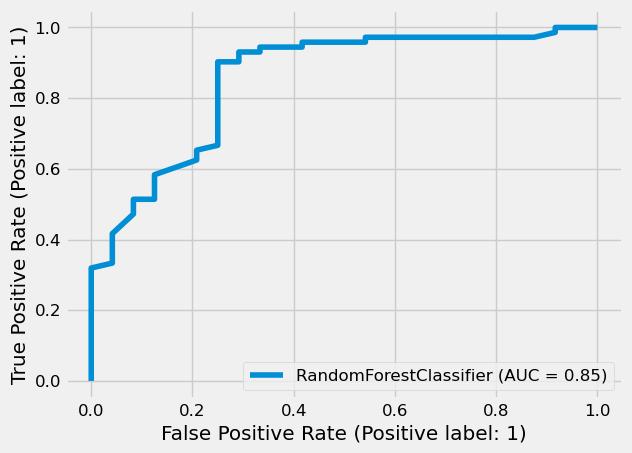

For XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
              precision    recall  f1-score   support

           0       0.54      0.58      0.56        24
           1       0.86      0.83      0.85        72

    accuracy                           0.77        96
   macro avg       0.70      0.71      0.70        96
weighted avg       0.78  

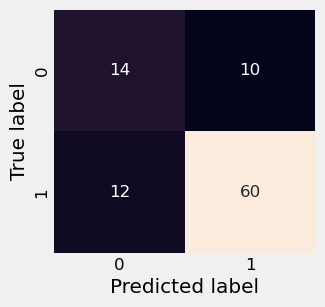

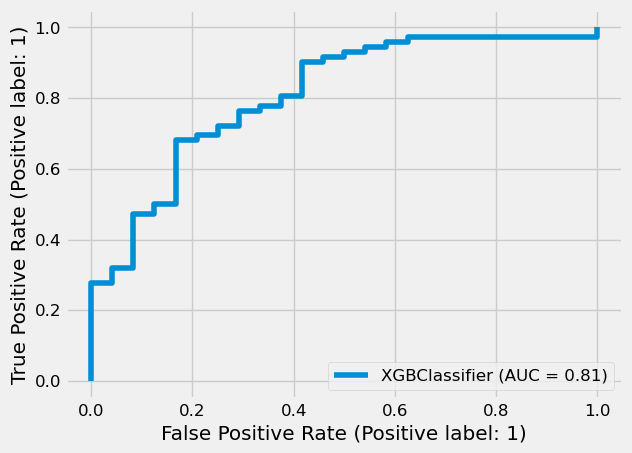

For LGBMClassifier()
              precision    recall  f1-score   support

           0       0.58      0.62      0.60        24
           1       0.87      0.85      0.86        72

    accuracy                           0.79        96
   macro avg       0.72      0.74      0.73        96
weighted avg       0.80      0.79      0.79        96



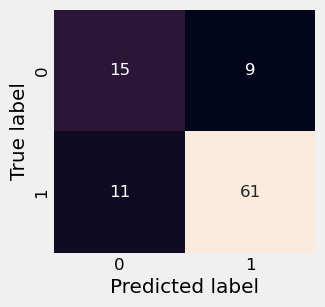

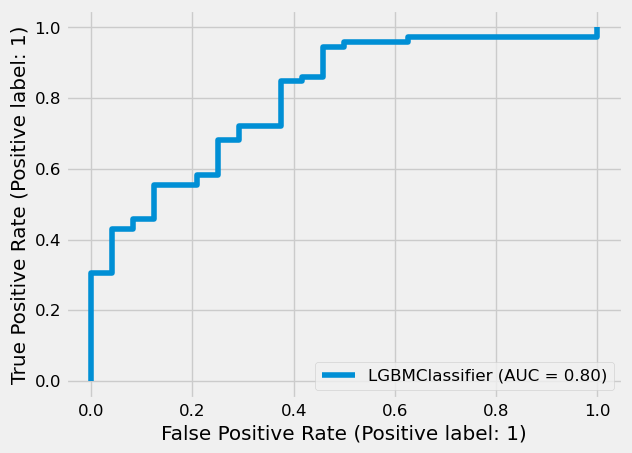

For GradientBoostingClassifier()
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        24
           1       0.88      0.88      0.88        72

    accuracy                           0.81        96
   macro avg       0.75      0.75      0.75        96
weighted avg       0.81      0.81      0.81        96



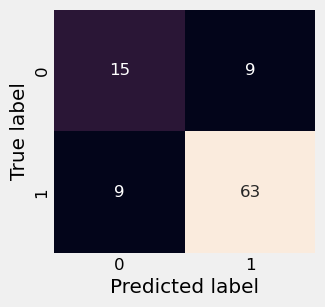

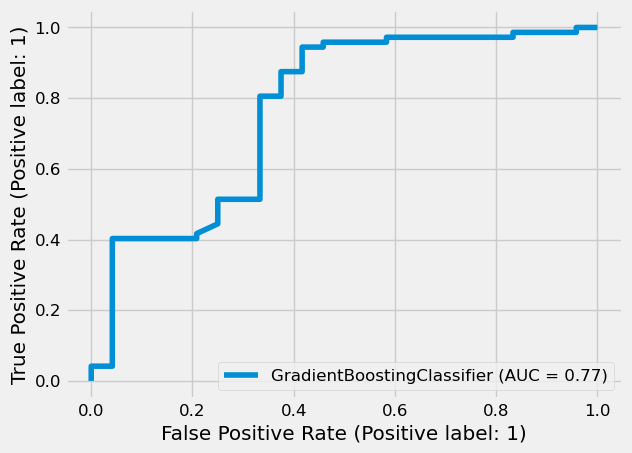

For SVC()
              precision    recall  f1-score   support

           0       0.71      0.42      0.53        24
           1       0.83      0.94      0.88        72

    accuracy                           0.81        96
   macro avg       0.77      0.68      0.70        96
weighted avg       0.80      0.81      0.79        96



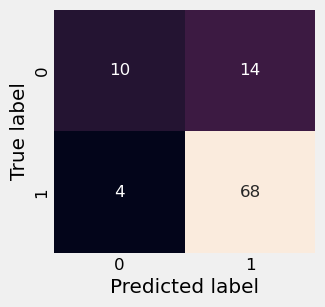

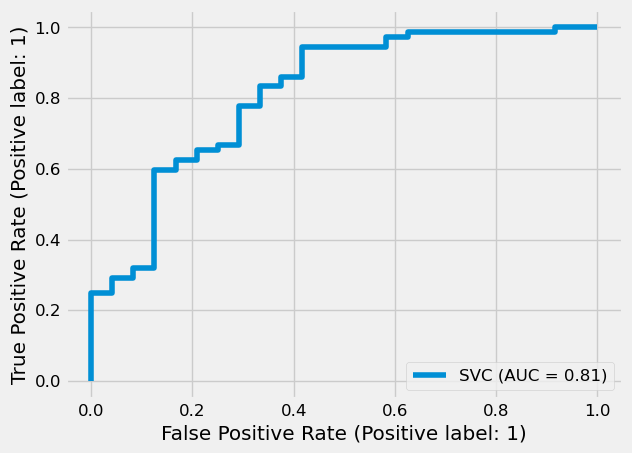

For MLPClassifier()
              precision    recall  f1-score   support

           0       0.87      0.54      0.67        24
           1       0.86      0.97      0.92        72

    accuracy                           0.86        96
   macro avg       0.87      0.76      0.79        96
weighted avg       0.86      0.86      0.85        96



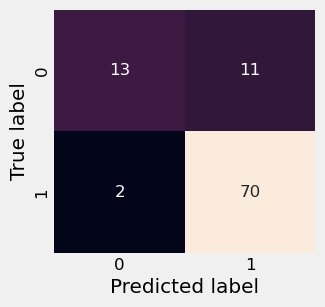

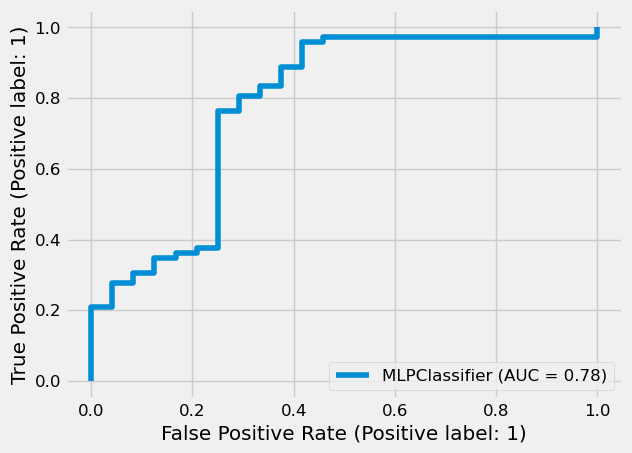

For DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.49      0.75      0.59        24
           1       0.90      0.74      0.81        72

    accuracy                           0.74        96
   macro avg       0.69      0.74      0.70        96
weighted avg       0.80      0.74      0.75        96



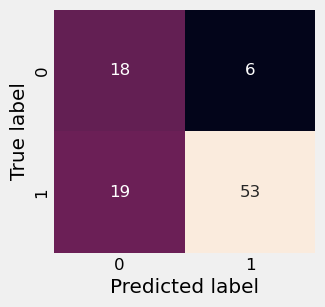

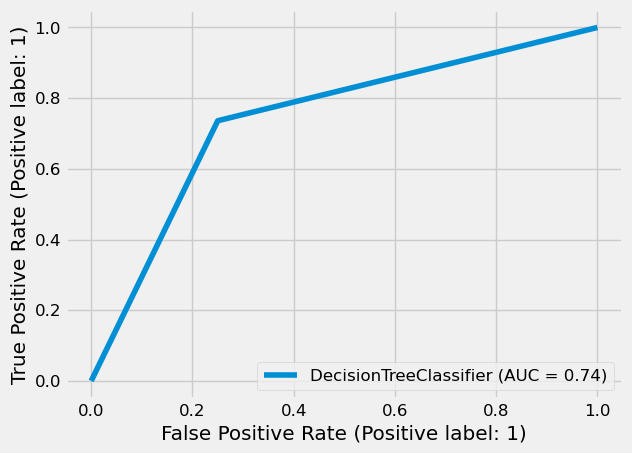

In [158]:
for model_name, model in models.items():
    display_all_metric(model, X_train, y_train, X_test, y_test)

By combining these evaluation metrics, we can assess the model's performance from different perspectives. The confusion matrix helps us understand the prediction errors, the classification report provides detailed metrics for each class, and the ROC-AUC curve offers a summarized performance measure that accounts for imbalanced classes.

The winning model, or the model with the highest score among the trained models, is the Random Forest, which will be used for the rest of our project.

## Enhancing Model Performance with RandomizedSearchCV for Hyperparameter Tuning


In the pursuit of optimizing our models, we will be employing the powerful technique of hyperparameter tuning using RandomizedSearchCV. This process will enable us to fine-tune our Random Forest  classifier.


In [47]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint
from sklearn.metrics import make_scorer, roc_auc_score

In [157]:

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

rf_param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}


Now that we have established hyperparameter grids for each of our model, let's proceed with tuning them using RandomizedSearchCV...

In [125]:
scorer = make_scorer(roc_auc_score)
# Create the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform Random Search with cross-validation
random_search = RandomizedSearchCV(rf, rf_grid, n_iter=20, cv=5, scoring=scorer, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

/home/deep/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/deep/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/deep/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/deep/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={n

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   random_state=42, scoring=make_scorer(roc_auc_score))

In [130]:
# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Param: ", best_params)

Best Param:  {'n_estimators': 310, 'min_samples_split': 12, 'min_samples_leaf': 5, 'max_depth': None}


In [132]:
best_model = random_search.best_estimator_
best_model

RandomForestClassifier(min_samples_leaf=5, min_samples_split=12,
                       n_estimators=310, random_state=42)

In [134]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for GridSearch
param_grid_gridsearch = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [2, 5, 10, 20, 50, 70, 100],
    'max_features': [2, 3, 5, 8, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 8, 10],
    'min_samples_leaf': [3, 4, 5, 8, 10],
    'bootstrap': [True, False]
}

# Perform Grid Search on the best model from RandomizedSearchCV
grid_search = GridSearchCV(best_model, param_grid_gridsearch, cv=5, n_jobs = -1, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from Grid Search
best_params_gridsearch = grid_search.best_params_

/home/deep/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/deep/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/deep/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/deep/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={n

In [135]:
best_model_r = grid_search.best_estimator_
best_model_gr

RandomForestClassifier(max_depth=2, max_features=7, min_samples_leaf=5,
                       n_estimators=300, random_state=42)

For RandomForestClassifier(max_depth=2, max_features=7, min_samples_leaf=5,
                       n_estimators=300, random_state=42)
              precision    recall  f1-score   support

           0       0.86      0.50      0.63        24
           1       0.85      0.97      0.91        72

    accuracy                           0.85        96
   macro avg       0.86      0.74      0.77        96
weighted avg       0.85      0.85      0.84        96



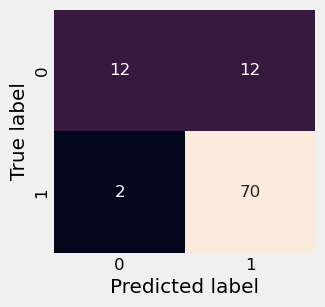

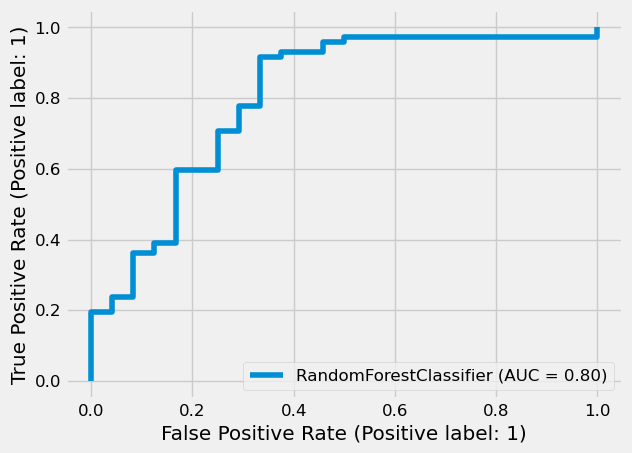

In [136]:
display_all_metric(best_model_gr, X_train, y_train, X_test, y_test)

Achieving an AUC score of 0.80 is a positive outcome and indicates that your model is performing well in distinguishing between customers who would have their home loan approved and those who would not.

In [148]:
inputs = [[1, 0, 0, 1, 1, 176, 120, 1, 2, 0]]

pred_inputs = best_model_gr.predict(inputs)
pred_inputs[0]

1

### Next Steps: Model Deployment Using Pickle File

In [152]:
import pickle

In [154]:
with open("home_loan_approval_model.pkl", 'wb') as file:
    pickle.dump(best_model_gr, file)

In [156]:
# Save the StandardScaler
with open('scaler.pkl', 'wb') as stds:
    pickle.dump(scaler, stds)